In [1]:
import pandas as pd
import numpy as np
import librosa as lb
from sklearn.ensemble import RandomForestClassifier
import joblib
import os

In [2]:
# Load model
clf = joblib.load("random_forest.pkl")

C:\Users\SARTHAK\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\SARTHAK\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [64]:
import sounddevice as sd

from scipy.io.wavfile import write

# Recording settings
samplerate = 44100  #  Hz 
duration = 7  

print("Recording...")
audio_data = sd.rec(int(samplerate * duration), samplerate=samplerate, channels=1, dtype=np.int16)
sd.wait()  
print("Recording finished.")

# Save as WAV file
a=write("recorded_audio.wav", samplerate, audio_data)
print("Audio saved as recorded_audio.wav")


Recording...
Recording finished.
Audio saved as recorded_audio.wav


In [65]:
import IPython.display as ipd
ipd.Audio("recorded_audio.wav")


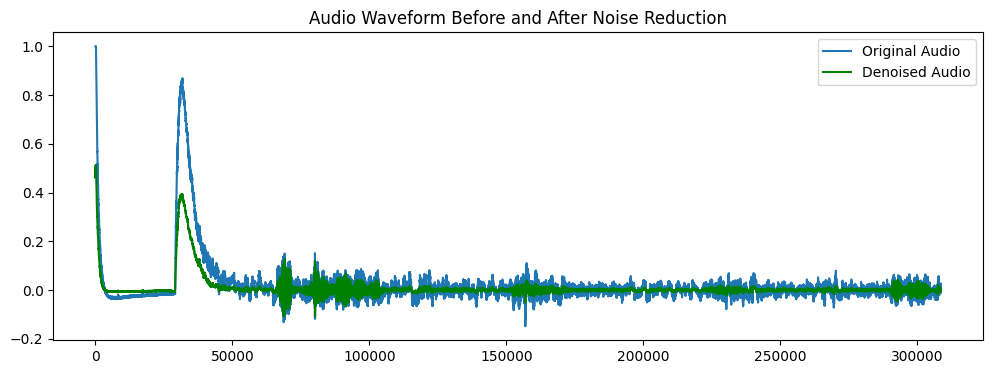

In [15]:
import noisereduce as nr
import librosa
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import sounddevice as sd

# Load the audio file
file_path = "recorded_audio.wav"  
rate, audio_data = wav.read(file_path)

if audio_data.dtype == np.int16:
    audio_data = audio_data.astype(np.float32) / 32768.0  # Normalize

# noise reduction
reduced_noise = nr.reduce_noise(y=audio_data, sr=rate, prop_decrease=0.8)

# Plot waveforms before and after noise reduction
plt.figure(figsize=(12, 4))
plt.plot(audio_data, label="Original Audio")
plt.plot(reduced_noise, label="Denoised Audio", color="green")
plt.legend()
plt.title("Audio Waveform Before and After Noise Reduction")
plt.show()

# Save the cleaned audio file
wav.write("cleaned_audio.wav", rate, (reduced_noise * 32768).astype(np.int16))



In [16]:
import os

file_name = "cleaned_audio.wav"
audio_path = os.path.abspath(file_name)



In [17]:

def extract_features(audio_path):
    """Extract MFCC features from an audio file."""
    data, sr = lb.load(audio_path, sr=None, mono=True, offset=1.0, duration=10)
    mfcc = lb.feature.mfcc(y=data, sr=sr, n_mfcc=20, hop_length=256, n_mels=40)

    # Convert to a fixed-size feature vector (mean pooling)
    feature_vector = np.mean(mfcc, axis=1)
    return feature_vector

In [18]:
X_new = extract_features(audio_path)
X_new = np.array(X_new).reshape(1, -1)
X_new = X_new.reshape(1, -1)  # Reshape for ML models

# For LSTM-based models, reshape to (1, time_steps, features)
X_new_lstm = X_new.reshape(1, 1, X_new.shape[1])


In [53]:
def emotion(file_path ):
    # Load the audio file
    
    rate, audio_data = wav.read(file_path)

    if audio_data.dtype == np.int16:
        audio_data = audio_data.astype(np.float32) / 32768.0  # Normalize

    # noise reduction
    reduced_noise = nr.reduce_noise(y=audio_data, sr=rate, prop_decrease=0.8)

   

    # Save the cleaned audio file
    wav.write("cleaned_audio.wav", rate, (reduced_noise * 32768).astype(np.int16))
   

    file_name = "cleaned_audio.wav"
    audio_path = os.path.abspath(file_name)
    X_new = extract_features(audio_path)
    X_new = np.array(X_new).reshape(1, -1)
    X_new = X_new.reshape(1, -1)  # Reshape for ML models
    
    # For LSTM-based models, reshape to (1, time_steps, features)
    X_new_lstm = X_new.reshape(1, 1, X_new.shape[1])
    emotion_pred = clf.predict(X_new)[0]  # Predict label
    emotion_map = {
        1: "Neutral",
        2: "Calm",
        3: "Happy",
        4: "Angry",#
        5: "Excited",#
        6: "chearful",#
        7: "Disgust",
        8: "Surprised"#
    }
    print(f"Predicted Emotion: {emotion_map[emotion_pred]}")



    
    

In [66]:
emotion(file_path)

Predicted Emotion: chearful
